In [1]:
print("ok")

ok


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cars_clus.csv')

# Display the first few rows of the dataset
data.head()


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [3]:

# Get the dimensions of the dataset
dimensions = data.shape
print(f"Dimensions of the dataset: {dimensions}")

Dimensions of the dataset: (159, 16)


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64


In [5]:
# Remove rows with missing values
data_cleaned = data.dropna()
data = data.dropna()
# Display the dimensions of the cleaned dataset
cleaned_dimensions = data_cleaned.shape
print(f"Dimensions of the cleaned dataset: {cleaned_dimensions}")


Dimensions of the cleaned dataset: (157, 16)


In [6]:

# Get the dimensions of the dataset
dimensions = data.shape
print(f"Dimensions of the dataset: {dimensions}")

Dimensions of the dataset: (157, 16)


In [7]:
import numpy as np

# Replace "$null$" with NaN
data.replace("$null$", np.nan, inplace=True)

# Check for missing values again
missing_values_null = data.isnull().sum()
print("Number of missing values (including $null$) in each column:")
print(missing_values_null)


Number of missing values (including $null$) in each column:
manufact      0
model         0
sales         0
resale       36
type          0
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       0
partition     0
dtype: int64


In [8]:
print(data.dtypes)

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object


In [9]:
import pandas as pd
import numpy as np

# Columns to convert to numeric
numeric_columns = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 
                   'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

# Convert the columns to numeric, coercing errors to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [10]:
print(data.dtypes)

manufact      object
model         object
sales        float64
resale       float64
type          object
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
dtype: object


In [11]:
data["type"] = data["type"].apply(pd.to_numeric, errors='coerce')

In [12]:
print(data.dtypes)

manufact      object
model         object
sales        float64
resale       float64
type         float64
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
dtype: object


In [13]:
# Replace missing values in the specified columns with the mean of those columns
for col in numeric_columns:
    data[col].fillna(data[col].mean(), inplace=True)

In [14]:
# Check for missing values after handling
missing_values_final = data.isnull().sum()
print("Number of missing values after handling:")
print(missing_values_final)

Number of missing values after handling:
manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64


In [15]:
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.0,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0


In [16]:
# Perform one-hot encoding on 'manufact' and 'model' columns 
data = pd.get_dummies(data, columns=['manufact', 'model'])

In [17]:
# Get the dimensions of the dataset
dimensions = data.shape
print(f"Dimensions of the dataset: {dimensions}")

Dimensions of the dataset: (157, 200)


In [18]:
data.head()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,...,model_Town & Country,model_Town car,model_V40,model_V70,model_Villager,model_Viper,model_Voyager,model_Windstar,model_Wrangler,model_Xterra
0,16.919,16.360,0.0,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,...,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875,0.0,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,...,0,0,0,0,0,0,0,0,0,0
2,14.114,18.225,0.0,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,...,0,0,0,0,0,0,0,0,0,0
3,8.588,29.725,0.0,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,...,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255,0.0,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Normalize numerical variables
from sklearn.preprocessing import StandardScaler

numerical_features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the preprocessed dataset
data.head()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,...,model_Town & Country,model_Town car,model_V40,model_V70,model_Villager,model_Viper,model_Voyager,model_Windstar,model_Wrangler,model_Xterra
0,-0.532042,-0.171071,0.0,-0.414437,-1.214763,-0.81559,-0.828080,-1.122510,-1.119712,-1.183485,...,0,0,0,0,0,0,0,0,0,0
1,-0.200761,0.179964,0.0,0.071004,0.134013,0.69316,0.080714,-0.247827,0.416338,0.222555,...,0,0,0,0,0,0,0,0,0,0
2,-0.573406,0.015182,0.0,0.000000,0.134013,0.69316,-0.077337,-0.160359,0.348901,0.147289,...,0,0,0,0,0,0,0,0,0,0
3,-0.654896,1.163662,0.0,1.027816,0.423037,0.42691,0.936825,0.072890,0.693576,0.755825,...,0,0,0,0,0,0,0,0,0,0
4,-0.480754,0.417650,0.0,-0.239256,-1.214763,-0.63809,-0.643687,-0.860105,-0.700108,-0.608578,...,0,0,0,0,0,0,0,0,0,0


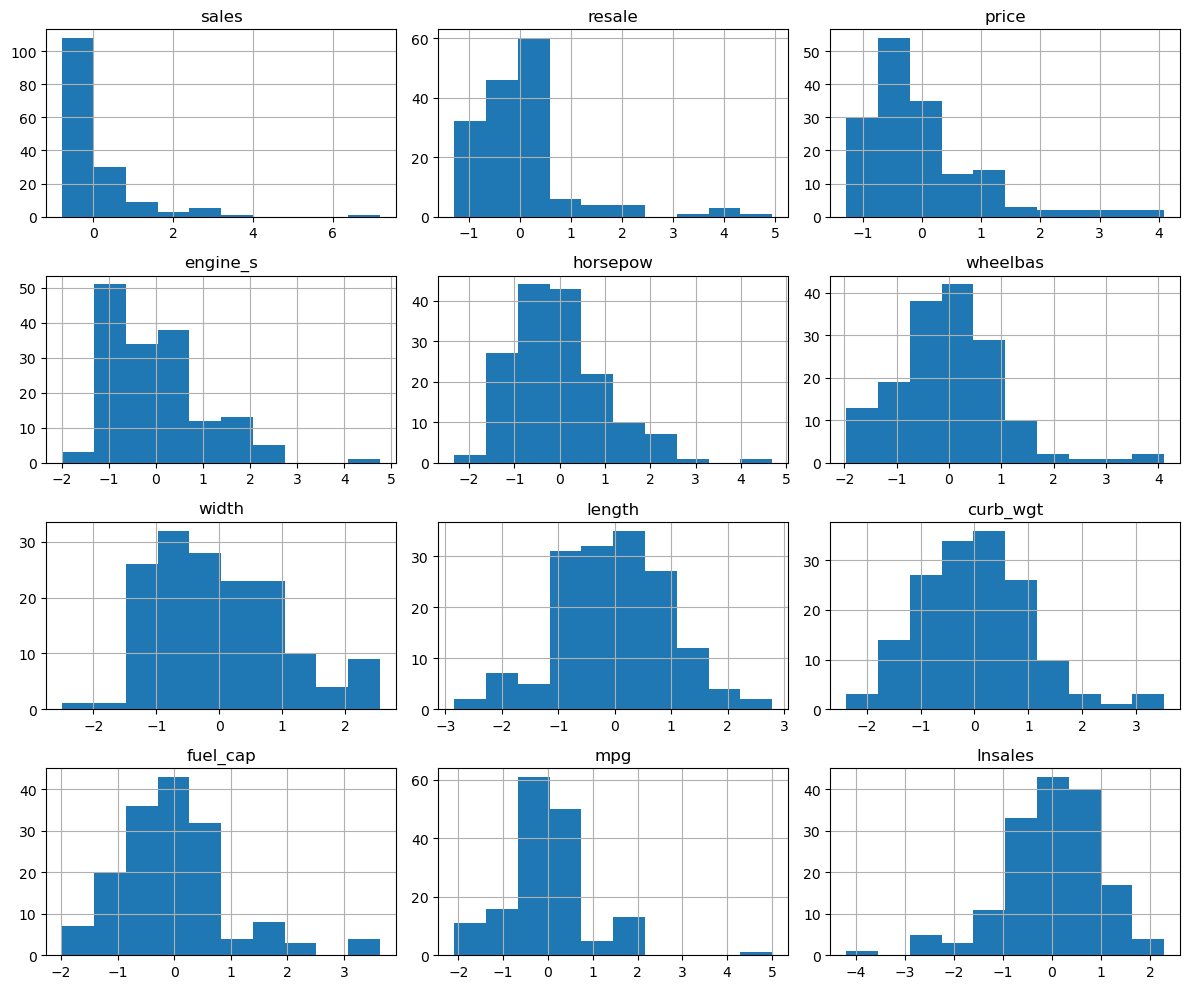

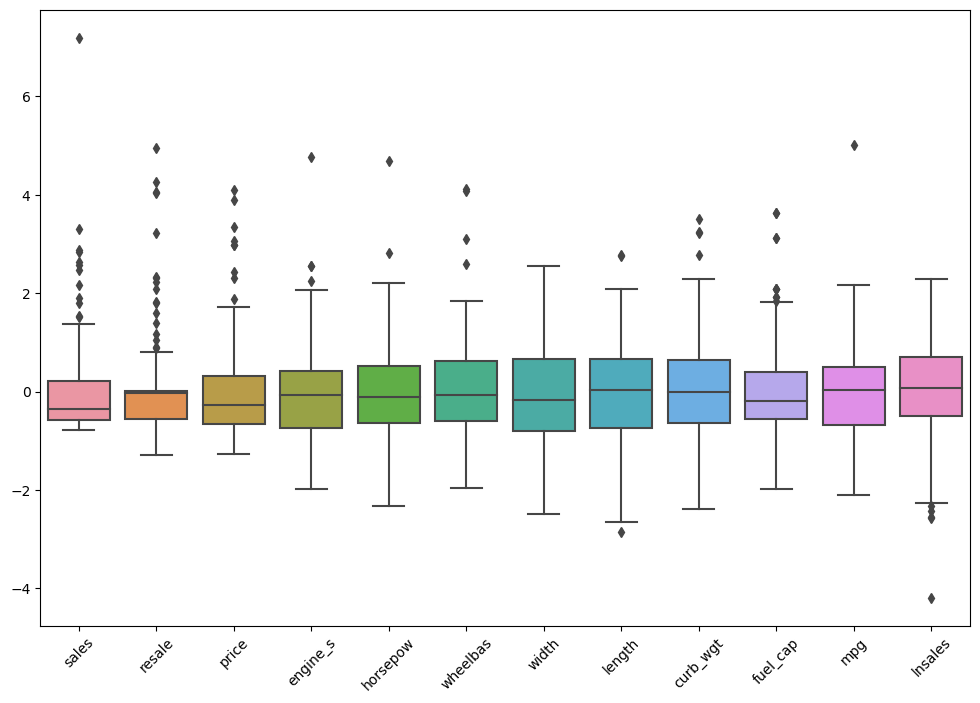

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for visualization
numerical_columns = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

# Plot histograms for numerical features
data[numerical_columns].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=45)
plt.show()


In [21]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed

# Fit the model to the data
model.fit(data)

# Predict outliers
outliers = model.predict(data)

# Print the indices of outlier data points
outlier_indices = data.index[outliers == -1]
print("Indices of outlier data points:")
print(outlier_indices)


Indices of outlier data points:
Int64Index([6, 18, 26, 39, 53, 54, 55, 78], dtype='int64')


In [22]:

# Remove outliers from the DataFrame
data.drop(index=outlier_indices, inplace=True)



In [23]:
dimensions = data.shape
print(f"Dimensions of the dataset: {dimensions}")

Dimensions of the dataset: (149, 200)


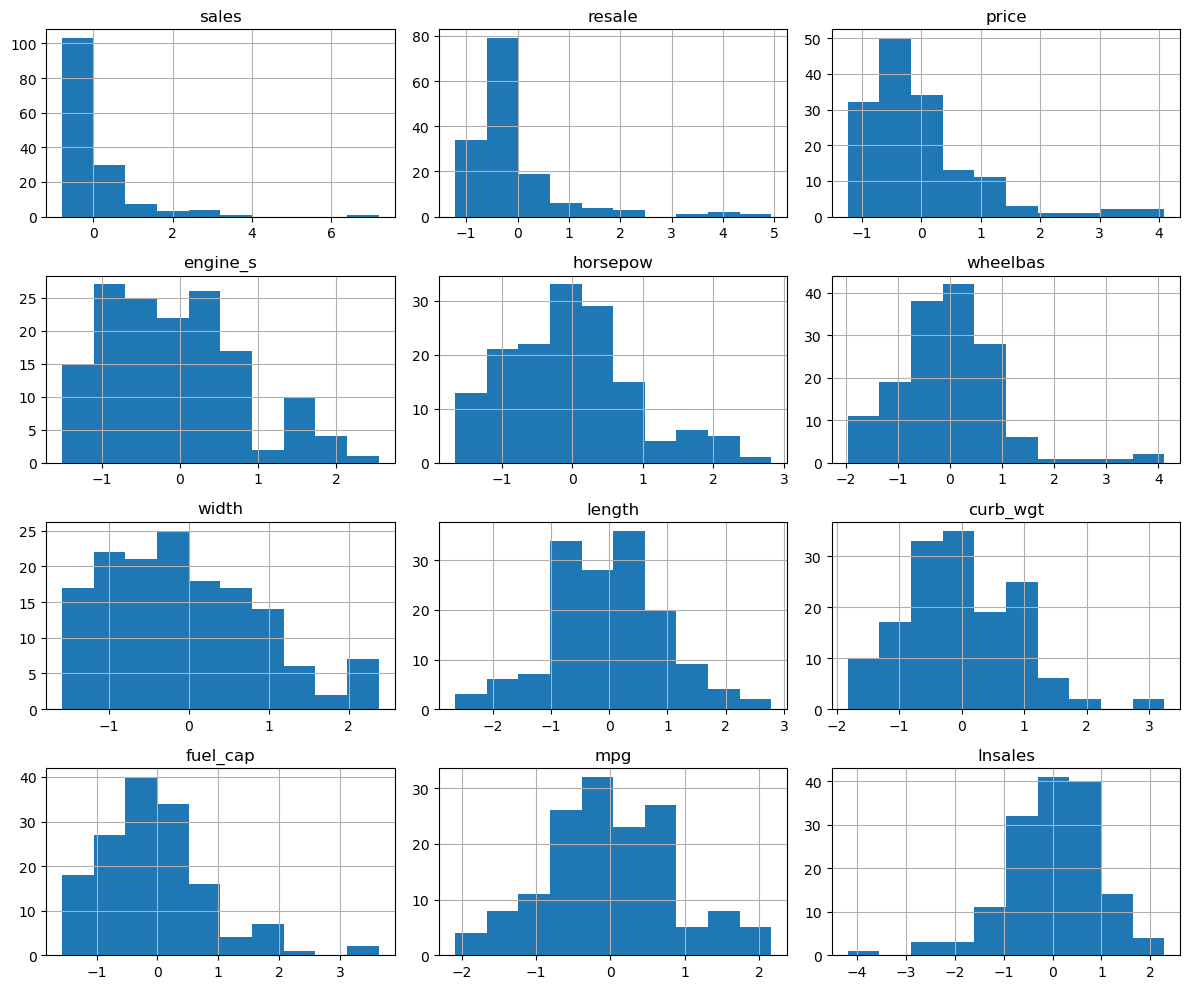

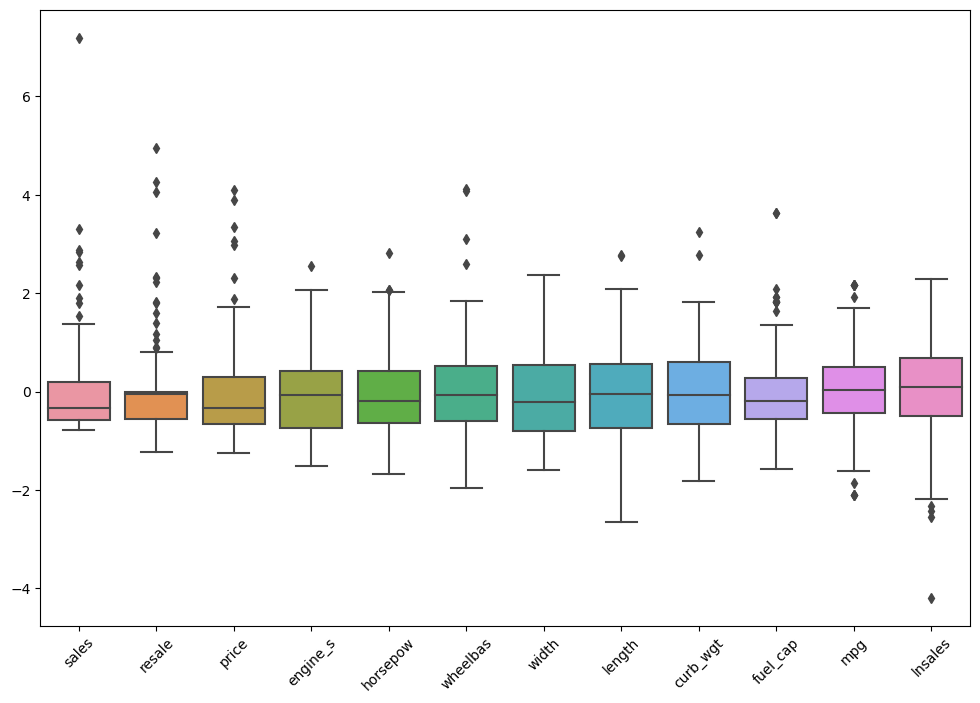

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for visualization
numerical_columns = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

# Plot histograms for numerical features
data[numerical_columns].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=45)
plt.show()


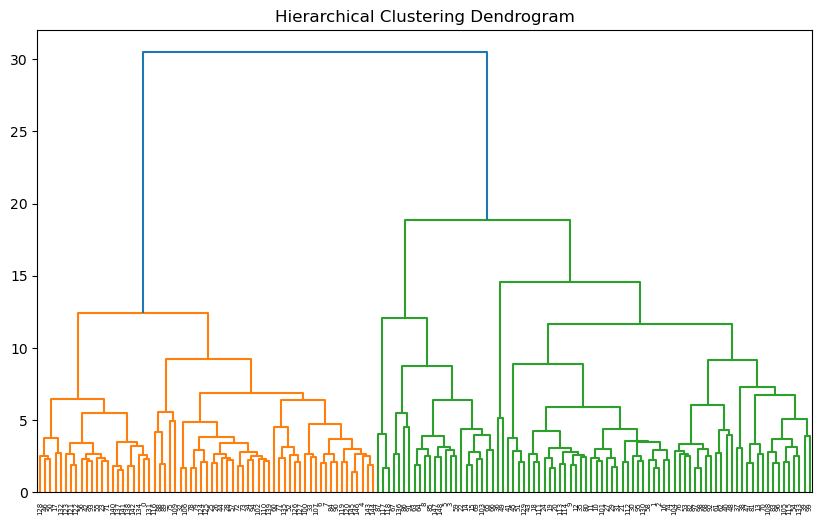

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
dend=shc.dendrogram(shc.linkage(data,method='ward'))



In [26]:
unique_colors=set(dend['color_list'])
print(unique_colors)

{'C0', 'C1', 'C2'}


In [27]:
number_of_clusters=len(unique_colors)-1

print(number_of_clusters)

2


In [28]:
from sklearn.cluster import AgglomerativeClustering

# Define hierarchical clustering model
agg_clustering = AgglomerativeClustering(n_clusters=number_of_clusters)

# Fit the model to your data
agg_clustering.fit(data)

# Retrieve the cluster labels
cluster_labels = agg_clustering.labels_

# Add the cluster labels to your DataFrame or data structure
data['cluster'] = cluster_labels

# Print the counts of each cluster
print("Counts of each cluster:")
print(data['cluster'].value_counts())


Counts of each cluster:
0    84
1    65
Name: cluster, dtype: int64


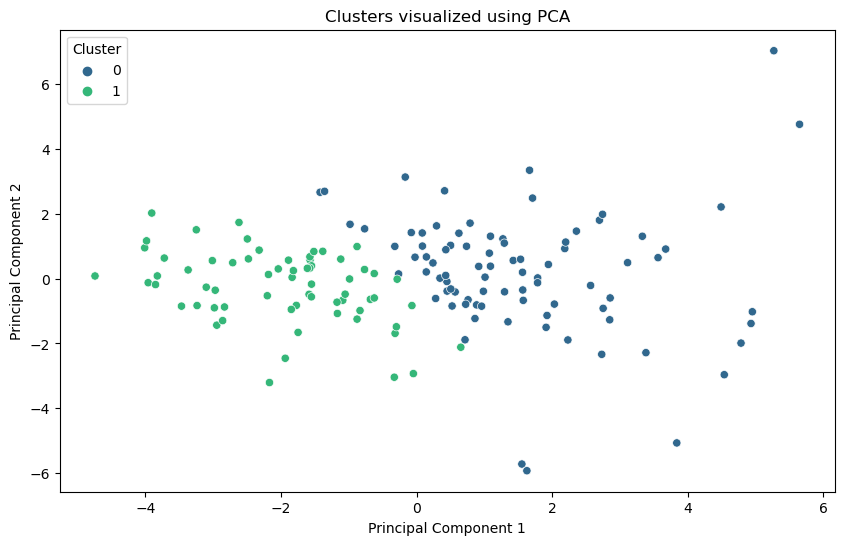

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select only the numerical features for PCA
numerical_data = data[numerical_features]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data)

# Create a DataFrame with the principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['Component 1', 'Component 2'])
pca_df['cluster'] = cluster_labels

# Visualize clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clusters visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


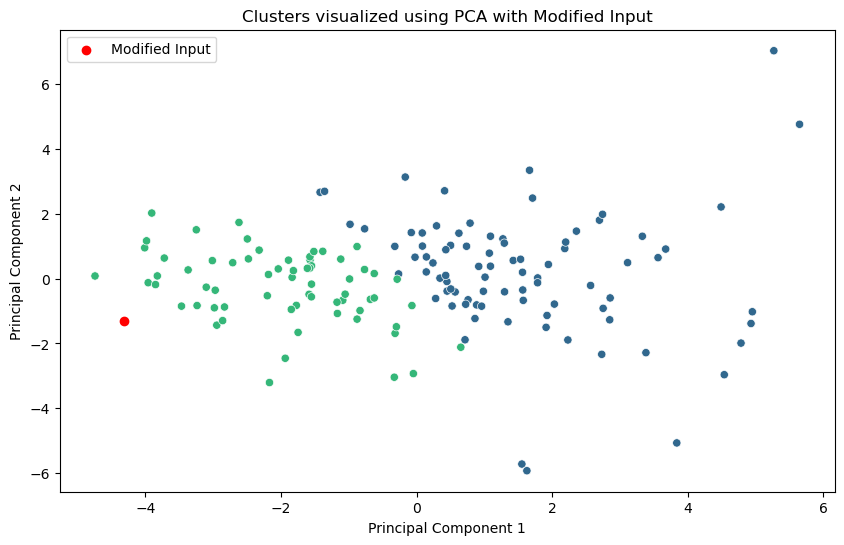

In [30]:
# Extract data from one row of the DataFrame (for example, the first row)
row_data = data.iloc[0]

# Extract numerical features from the row data
provided_input = row_data[numerical_features].values.reshape(1, -1)

# Modify the provided input to make it look different
modified_input = provided_input * 1.5  # Multiply by a factor

# Transform the modified input using PCA
modified_pca = pca.transform(modified_input)

# Plot clusters visualized using PCA with modified input
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='cluster', data=pca_df, palette='viridis', legend=False)
plt.scatter(modified_pca[:, 0], modified_pca[:, 1], color='red', label='Modified Input')
plt.title('Clusters visualized using PCA with Modified Input')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
